In [1]:
#%run -i '../scripts/utility_readblt.py' 'mumu'

In [2]:
from utility_common import *
from utility_plotter import *
from utility_templatefitter_multihist import *

from IPython.display import clear_output

## add plotting option and load plotting parameter table
%matplotlib inline
#%qtconsole --style monokai
plt.style.use('classic')
plt.rc("figure",facecolor="w",figsize=(6,4))
plt.rc("font",size=10)
plt.rc("savefig",dpi=300)

pp = pd.read_csv("plotter/plotparameters4j.csv")

# 1. perform fit

### 1.1 Load Template and target

In [7]:
tp = Template(selection="e4j", nbjetcut=">1")

In [8]:
template,templatevar2,target,targetvar2 = [],[],[],[]

#for variable in ['jet1_pt','jet2_pt','lepton1_pt','lepton2_pt','dilepton_mass']:
for variable in ['jet1_pt','lepton1_pt']:

    row = pp[pp['var'] == variable]
    v,a,b,step = row['var'], row['lower'], row['upper'],row['step']
    v,a,b,step = v.values[0],a.values[0],b.values[0],step.values[0]
    
    tp.loadconfig(v,a,b,step)
    mchist,mcvar2,datahist,datavar2 = tp.maketemplate()
    
    template.append(mchist)
    templatevar2.append(mcvar2)
    target.append(datahist)
    targetvar2.append(datavar2)

### 1.2 Fit template to target

In [9]:
tfit = TemplateFitter(template,templatevar2,
                      target,   targetvar2,
                      lock = [1,0]
                     )
for i in range(tfit.adjust.size):
    print('{:6.3f} +/- {:6.3f}'.format(tfit.adjust[i], tfit.sigma[i]) )
        

 1.000 +/-  0.010
 0.956 +/-  0.008


# 2. Plot Results

### 2.1 Chect a plot

In [16]:
df_list = tp.df_list
selection = tp.selection

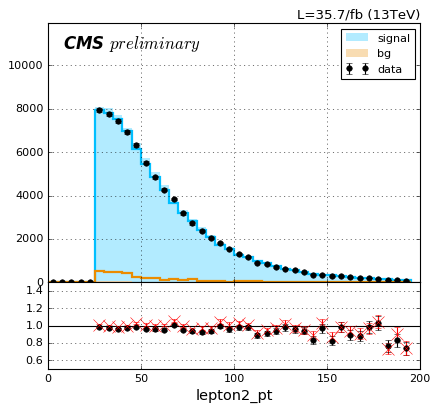

In [17]:
v,a,b,step,xl = "lepton1_pt",0,200,5,"lepton2_pt"

plotter = FitPlotter(v,a,b,step,df_list,adjust=tfit.adjust)
plotter.settingPlot(xl,label_list,color_list)
plotter.plotFittingResult()

### 2.2 Plot All

In [103]:
for index, row in pp.iterrows():
    adj = tfit.adjust
    v,a,b,step,xl = row["var"], row["lower"], row["upper"], row["step"], row["xlabel"]
    plotter = FitPlotter(v,a,b,step,df_list,adjust=tfit.adjust)
    plotter.settingPlot(xl,label_list,color_list)
    plotter.plotFittingResult("../plot/{}/fit/".format(selection))
    
    # print out process
    print("making plots: {0}/{1}".format(index,len(pp)))
    clear_output(wait=True)
    plt.close()

making plots: 19/20
